In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [75]:
# sp1_init = lab.T1
# sp2_init = lab.T2
window = 5
t = np.linspace(0, ns-1, ns)

ns = 120 * 60

sp1_init = 25
sp2_init = 25

# Setpoint Sequence
sp1 = np.ones(ns) * sp1_init
sp1[window*30-1:] = 43
sp1[10*60:] = 53
sp1[16*60:] = 62
sp1[25*60:] = 74
sp1[36*60:] = 90
sp1[47*60:] = 70
sp1[58*60:] = 82
sp1[75*60:] = 52
sp1[93*60:] = 47
sp1[108*60:] = 33



sp2 = np.ones(ns) * sp2_init
sp2[window*30-1:] = 35
sp2[13*60:] = 40
sp2[19*60:] = 59
sp2[40*60:] = 65
sp2[50*60:] = 52
sp2[58*60:] = 61
sp2[65*60:] = 65
sp2[73*60:] = 35
sp2[91*60:] = 43
sp2[104*60:] = 31

sp = np.array([sp1, sp2]).T


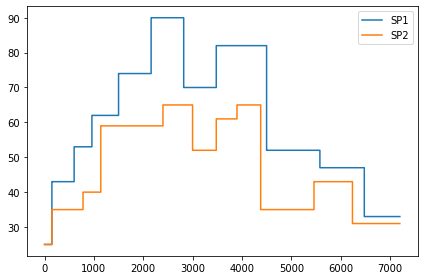

In [76]:
plt.subplot(1, 1, 1)

plt.step(t, sp[:, 0], label='SP1')
plt.step(t, sp[:, 1], label='SP2')
plt.legend()
plt.tight_layout()

plt.savefig('Random_SP_2h.png')

plt.show()

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate avg of elapsed time

data = pd.read_pickle('TCLab_MIMO_Control_one_LSTM_20_20_1_1_1hr.pkl')
data2 = pd.read_pickle('TCLab_MIMO_Control_mul_trans_20_20_1_1_1hr.pkl')

data_time = data.iloc[150:, [False, False, False, False, False, False, True]]
data_sum = data_time.iloc[0::30]

data_time2 = data2.iloc[150:, [False, False, False, False, False, False, True]]
data_sum2 = data_time2.iloc[0::10]

sum = int(data_sum.sum())
sum2 = int(data_sum2.sum())

min = float (data_sum.min())
min2 = float (data_sum2.min())

max = float (data_sum.max())
max2 = float (data_sum2.max())


data_S1 = data.iloc[:, [False, False, False, False, True, False, False]]
data_S2 = data.iloc[:, [False, False, False, False, False, True, False]]
data_T1 = data.iloc[:, [False, False, True, False, False, False, False]]
data_T2 = data.iloc[:, [False, False, False, True, False, False, False]]

data2_S1 = data2.iloc[:, [False, False, False, False, True, False, False]]
data2_S2 = data2.iloc[:, [False, False, False, False, False, True, False]]
data2_T1 = data2.iloc[:, [False, False, True, False, False, False, False]]
data2_T2 = data2.iloc[:, [False, False, False, True, False, False, False]]


npdata_S1 = data_S1.to_numpy()
npdata_S2 = data_S2.to_numpy()
npdata_T1 = data_T1.to_numpy()
npdata_T2 = data_T2.to_numpy()

npdata2_S1 = data2_S1.to_numpy()
npdata2_S2 = data2_S2.to_numpy()
npdata2_T1 = data2_T1.to_numpy()
npdata2_T2 = data2_T2.to_numpy()

R1_SP_T1 = npdata_S1 - npdata_T1
R1_SP_T2 = npdata_S2 - npdata_T2

R2_SP_T1 = npdata2_S1 - npdata2_T1
R2_SP_T2 = npdata2_S2 - npdata2_T2

R1_LSTM1 = R1_SP_T1**2
R1_LSTM2 = R1_SP_T2**2

R2_Trans1 = R2_SP_T1**2
R2_Trans2 = R2_SP_T2**2


R1_LSTM1_avg = R1_LSTM1.sum() / R1_LSTM1.size
R1_LSTM2_avg = R1_LSTM2.sum() / R1_LSTM2.size

R2_Trans1_avg = R2_Trans1.sum() / R2_Trans1.size
R2_Trans2_avg = R2_Trans2.sum() / R2_Trans2.size


print('min of LSTM elapsed tiem:', round (min,2)) 
print('min of LSTM elapsed tiem:', round (max,2)) 
print('avg of LSTM elapsed time:', sum, '/', len(data_sum), '=', round(sum/len(data_sum),4))

print()

print('min of LSTM elapsed tiem:', round (min2,2)) 
print('min of LSTM elapsed tiem:', round (max2,2)) 
print('avg of Trans elapsed time:', sum2, '/', len(data_sum2), '=', round(sum2/len(data_sum2),4))

print()

print('T1 R^2 LSTM:', round(R1_LSTM1_avg, 4))
print('T2 R^2 LSTM:', round(R1_LSTM2_avg, 4))

print()

print('T1 R^2 Trans:', round(R2_Trans1_avg, 4))
print('T2 R^2 Trans:', round(R2_Trans2_avg, 4))







min of LSTM elapsed tiem: 13.61
min of LSTM elapsed tiem: 51.07
avg of LSTM elapsed time: 3283 / 115 = 28.5478

min of LSTM elapsed tiem: 0.79
min of LSTM elapsed tiem: 3.6
avg of Trans elapsed time: 193 / 115 = 1.6783

T1 R^2 LSTM: 10.9694
T2 R^2 LSTM: 11.0263

T1 R^2 Trans: 8.2596
T2 R^2 Trans: 8.0128


In [ ]:
data_H1 = data.iloc[:, [True, False, False, False, False, False, False]]
data_H2 = data.iloc[:, [False, True, False, False, False, False, False]]
data_T1 = data.iloc[:, [False, False, True, False, False, False, False]]
data_T2 = data.iloc[:, [False, False, False, True, False, False, False]]
data_S1 = data.iloc[:, [False, False, False, False, True, False, False]]
data_S2 = data.iloc[:, [False, False, False, False, False, True, False]]



plt.subplot(2,1,1)
plt.plot(data_T1, label='T1')
plt.plot(data_T2, label='T2')
plt.plot(data_S1, label='S1')
plt.plot(data_S2, label='S2')
plt.legend()

plt.subplot(2,1,2)
plt.plot(data_H1, label='H1')
plt.plot(data_H2, label='H2')
plt.legend()
plt.savefig('TCLab_MIMO_Control_one_LSTM.png')
plt.savefig('TCLab_MIMO_Control_one_LSTM.eps', format='eps')
plt.show